In [18]:
import joblib
import pandas as pd
import numpy as np
import shap
from sklearn.feature_selection import SelectKBest, f_classif

import warnings
warnings.filterwarnings("ignore")

np.random.seed(777)

In [19]:
original_feature_names = []

In [20]:
def prepare_train(path: str, selector) -> list:
    df_train = pd.read_csv(path)
    if 'Unnamed: 0' in df_train.columns:
        df_train = df_train.drop(columns=['Unnamed: 0'])
    X_train = df_train.loc[:, df_train.columns != 'Target']
    y_train = df_train['Target']

    global original_feature_names
    original_feature_names = X_train.columns.tolist()

    X_train = selector.fit_transform(X_train, y_train)
    return X_train, y_train

In [21]:
clf = joblib.load('../models-dump/logistic-regression/a82_f86.pkl')
selector = SelectKBest(score_func=f_classif, k=60)
X, _ = prepare_train('../data/preprocessed/train-validation/drp_XOHE_scld.csv', selector)

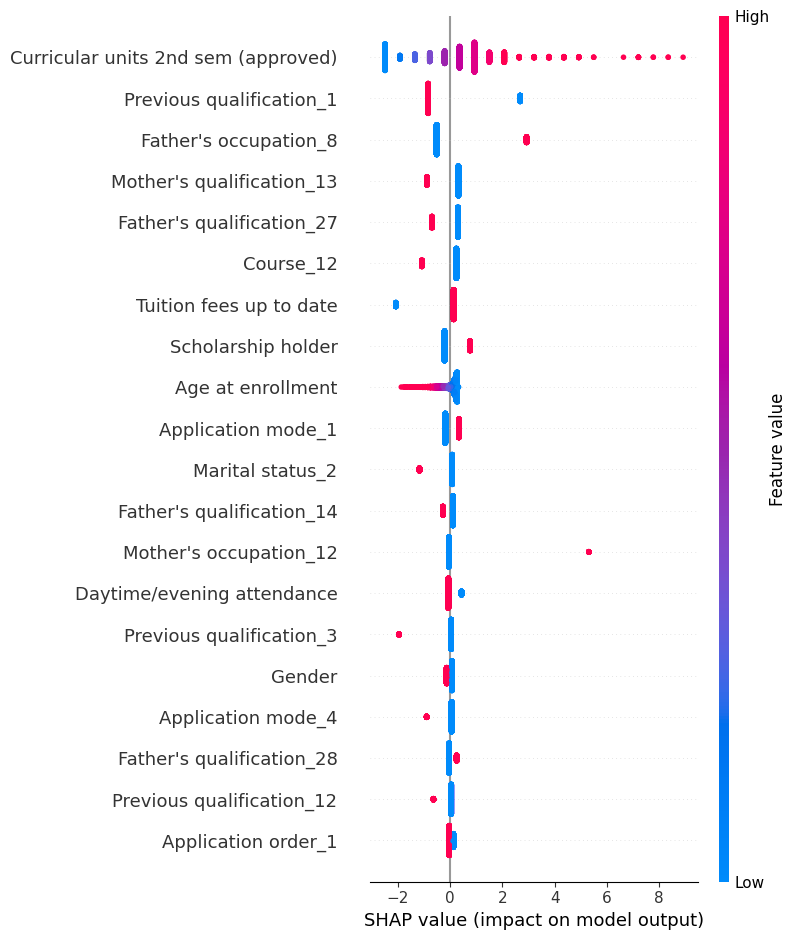

In [22]:
selected_features_indices = selector.get_support(indices=True)
selected_features = [original_feature_names[i] for i in selected_features_indices]

explainer = shap.Explainer(clf, X)
shap_values = explainer(X)

shap_feature_names = [original_feature_names[i] for i in selected_features_indices]

# Atribuir os nomes mapeados às características no gráfico SHAP
shap.summary_plot(shap_values, features=X, feature_names=shap_feature_names)

# Conclusão

Uma análise nos diz que o atributo mais importante para esse classificador foram as unidades curriculares aprovadas no segundo semestre. Além disso podemos notar que a qualificação e ocupação dos pais, se as mensalidades estão pagas e se o aluno possui alguma bolsa são atributos que também possuem alta relevância para o modelo.